<a href="https://colab.research.google.com/github/Ettelokeshwari/stock-price-prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras.models as sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [61]:
#Get the stock quote
import yfinance as yf
df=yf.download('AAPL',start='2012-01-01',end='2019-12-17')
#show the data
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449689,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516597,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655556,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787856,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.390457,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.948196,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.116241,137310400


In [62]:
#Get the number of rows and columns in data set
df.shape

(2002, 6)

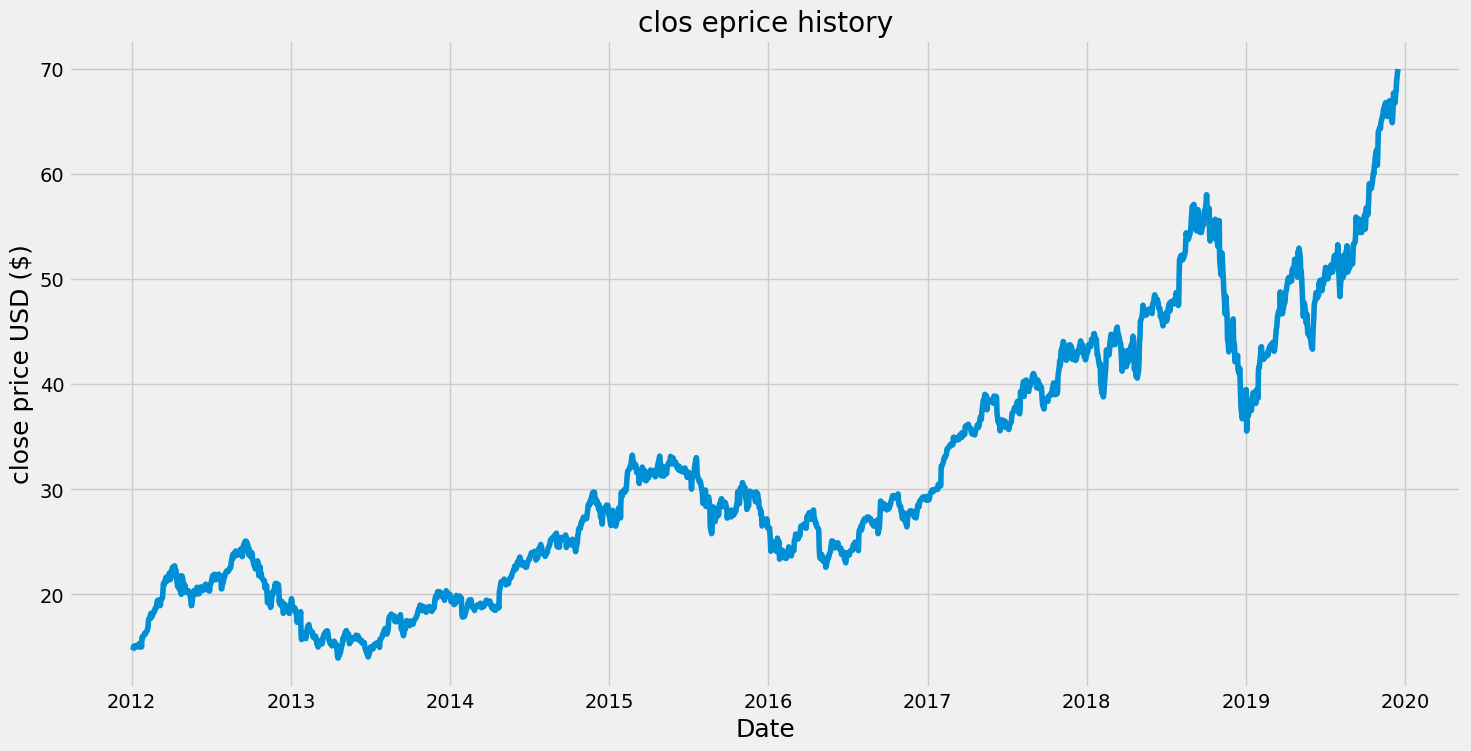

In [63]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('clos eprice history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD ($)',fontsize=18)
plt.show()

In [64]:
#Create new dataframe with only the close column
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1602

In [65]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,11))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[ 0.14517143],
       [ 0.1606703 ],
       [ 0.19286058],
       ...,
       [10.58762914],
       [10.76877802],
       [11.        ]])

In [66]:
#Create training data set
#Create the scaled training data set
train_data=scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.14517143, 0.1606703 , 0.19286058, 0.22350794, 0.21880914,
       0.22939891, 0.22455984, 0.21642463, 0.20534384, 0.2396381 ,
       0.27056599, 0.26102812, 0.20878025, 0.25864361, 0.2095518 ,
       0.39364607, 0.37940959, 0.3979943 , 0.43817934, 0.46251475,
       0.460481  , 0.45297707, 0.48495686, 0.51504297, 0.54912693,
       0.60417992, 0.71982612, 0.72157935, 0.7859599 , 0.83406966,
       0.7513853 , 0.78322463, 0.78259353, 0.87187056, 0.85917663,
       0.88267045, 0.92488943, 0.94838362, 1.01606014, 1.06536206,
       1.07959873, 1.08457825, 1.00028074, 0.97994242, 0.98295823,
       1.06220655, 1.08450821, 1.13240785, 1.24531878, 1.39596056,
       1.36776776, 1.3678378 , 1.47675163, 1.51083558, 1.48656984,
       1.46440864, 1.44133543, 1.51798856, 1.57058719, 1.59260832])]
[1.5381864212566714]

[array([0.14517143, 0.1606703 , 0.19286058, 0.22350794, 0.21880914,
       0.22939891, 0.22455984, 0.21642463, 0.20534384, 0.2396381 ,
       0.27056599, 0.26102812, 0.208

In [67]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train =np.array(x_train),np.array(y_train)

In [68]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [69]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [70]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [71]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 30s 18ms/step - loss: 0.0991


In [72]:
#Creating the testing data set
#Create a new array containing sacled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [73]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [74]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(400, 60, 1)

In [75]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 11ms/step


In [76]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.9779846096038818

<ipython-input-77-8d209d38be72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


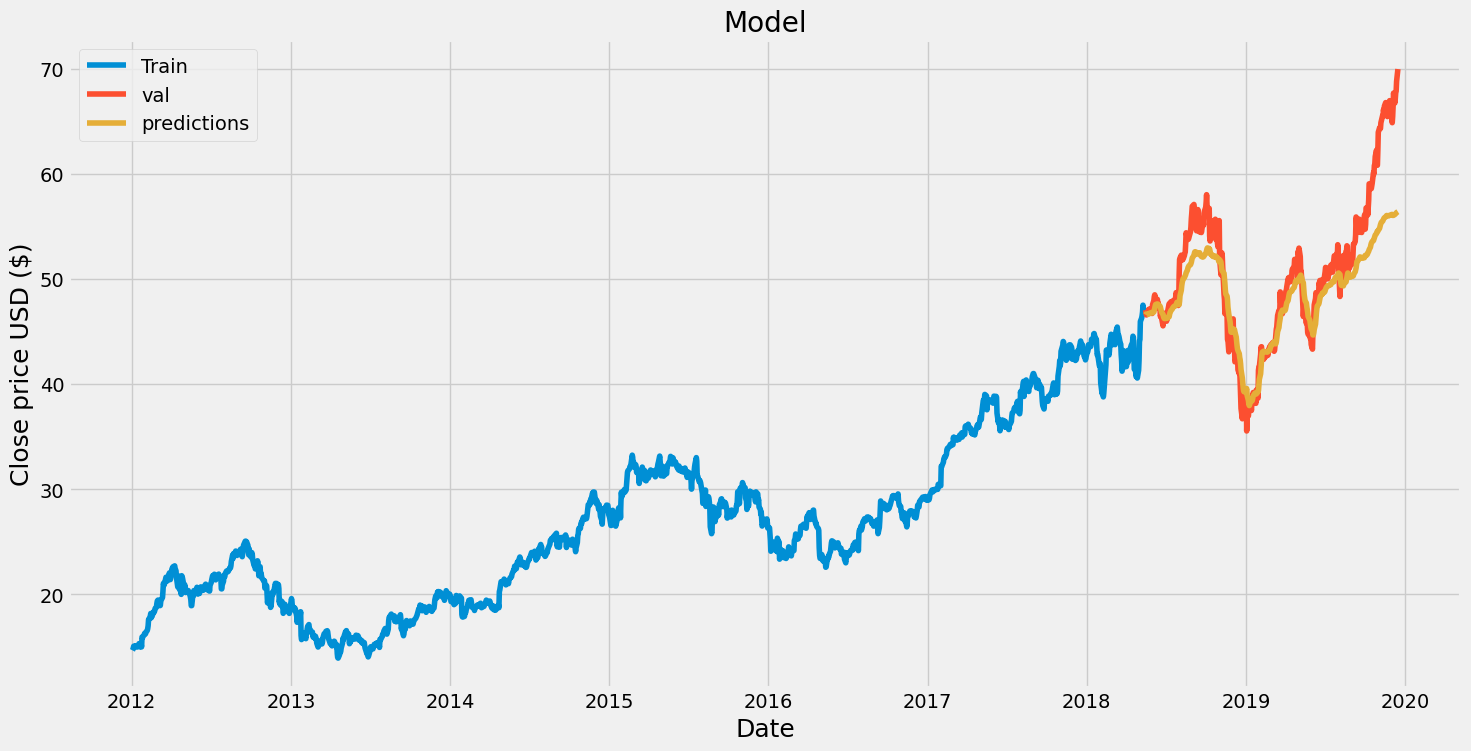

In [77]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','val','predictions'])
plt.show()

In [79]:
#Show the valid and predicted prices
valid

,Close,predictions
Date,,
2018-05-16,47.044998,46.598351
2018-05-17,46.747501,46.661991
2018-05-18,46.577499,46.672195
2018-05-21,46.907501,46.639080
2018-05-22,46.790001,46.649742
...,...,...
2019-12-10,67.120003,56.174370
2019-12-11,67.692497,56.211159
2019-12-12,67.864998,56.265327


In [81]:
#Get the quote
apple_quote = yf.download('AAPL',start='2012-01-01',end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
x_test = []
#Append the past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 20ms/step
[[56.509026]]


In [82]:
#Get the quote
apple_quote = yf.download('AAPL',start='2012-01-18',end='2019-12-18')
print(apple_quote['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2012-01-18    15.325357
2012-01-19    15.276786
2012-01-20    15.010714
2012-01-23    15.264643
2012-01-24    15.014643
                ...    
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
Name: Close, Length: 1993, dtype: float64
